## Advanced indexing and index tricks

### Indexing with Arrays of indices

In [1]:
import numpy as np

a = np.arange(12)**2
i = np.array([1,1,3,8,5])
a[i]

array([ 1,  1,  9, 64, 25])

In [5]:
a

array([  0,   1,   4,   9,  16,  25,  36,  49,  64,  81, 100, 121])

In [6]:
j = np.array([[3,4],[9,7]])
a[j]

array([[ 9, 16],
       [81, 49]])

In [8]:
palette = np.array([[0,0,0],    # black
                    [255,0,0],  # red
                    [0,255,0],  # green
                    [0,0,255],
                    [255,255,255]]) # blue

image = np.array([[0,1,2,0],
                 [0,3,4,0]])

palette[image]

array([[[  0,   0,   0],
        [255,   0,   0],
        [  0, 255,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0, 255],
        [255, 255, 255],
        [  0,   0,   0]]])

In [9]:
a = np.arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [10]:
i = np.array([[0, 1],   # indices for the first dim of a
              [1, 2]])

j = np.array([[2, 1],   # indices for the second dim
              [3, 3]])

a[i,j] # i and j must have same shape

array([[ 2,  5],
       [ 7, 11]])

In [13]:
a[i, 2]

array([[ 2,  6],
       [ 6, 10]])

In [14]:
a[:, j] # i.e., a[ : , j]

array([[[ 2,  1],
        [ 3,  3]],

       [[ 6,  5],
        [ 7,  7]],

       [[10,  9],
        [11, 11]]])

* In Python, arr[(i,j)] is exactly the same as i[i,j]. So i and j can be put in a tuple for indexing

In [16]:
l = (i, j)
a[l] # same as a[i,j]

array([[ 2,  5],
       [ 7, 11]])

In [17]:
# This will not work because it's passing an array, not a tuple.
# This will be interpreted as indexing the first dimension
s = np.array([i, j])
a[s]

IndexError: index 3 is out of bounds for axis 0 with size 3

In [18]:
# This is the same as a[i, j]
a[tuple(s)]

array([[ 2,  5],
       [ 7, 11]])

* Search for maximum val of time-dependent series

In [19]:
time = np.linspace(20,145,5)    # time scale
data = np.sin(np.arange(20)).reshape(5,4)    # 4 time-dependent series

time

array([ 20.  ,  51.25,  82.5 , 113.75, 145.  ])

In [20]:
data

array([[ 0.        ,  0.84147098,  0.90929743,  0.14112001],
       [-0.7568025 , -0.95892427, -0.2794155 ,  0.6569866 ],
       [ 0.98935825,  0.41211849, -0.54402111, -0.99999021],
       [-0.53657292,  0.42016704,  0.99060736,  0.65028784],
       [-0.28790332, -0.96139749, -0.75098725,  0.14987721]])

In [21]:
# index of the max for each series

ind = data.argmax(axis=0)
ind

array([2, 0, 3, 1])

In [22]:
# time corresponding to the maxima
time_max = time[ind]
data_max = data[ind, range(data.shape[1])]

time_max

array([ 82.5 ,  20.  , 113.75,  51.25])

In [23]:
data_max

array([0.98935825, 0.84147098, 0.99060736, 0.6569866 ])

In [24]:
np.all(data_max == data.max(axis=0))

True

* Using indexing with arrays as a target to assign to

In [25]:
a = np.arange(5)
a

array([0, 1, 2, 3, 4])

In [27]:
a[[1,3,4]] = 0
a

array([0, 0, 2, 0, 0])

In [29]:
a = np.arange(5)
a

array([0, 1, 2, 3, 4])

In [30]:
# if the same index is used multiple times, assignment will go in order, leaving the last one as the final assignment
a[[0,0,2]] = [1,2,3]
a

array([2, 1, 3, 3, 4])

In [31]:
# using the += operator does not increment 0 twice
# ... I mean, obviously - but thanks for the warning :P
a = np.arange(5)
a[[0,0,2]]+=1
a

array([1, 1, 3, 3, 4])

### Indexing with Boolean Arrays

In [32]:
a = np.arange(12).reshape(3,4)
b = a > 4 # build array of matching shape with True and False elements
b

array([[False, False, False, False],
       [False,  True,  True,  True],
       [ True,  True,  True,  True]])

In [33]:
a[b] # 1D array with selected elements

array([ 5,  6,  7,  8,  9, 10, 11])

In [34]:
a[b] = 0 # all a elements > 4 become 0
a

array([[0, 1, 2, 3],
       [4, 0, 0, 0],
       [0, 0, 0, 0]])

* Building an image of the mandlebrot set with boolean indexing

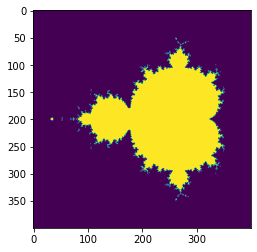

In [36]:
import matplotlib.pyplot as plt

def mandlebrot(h, w, maxit=20):
    """Returns an image of the Mandlebrot fractal of size (h,w). """
    y,x = np.ogrid[-1.4:1.4:h*1j, -2:0.8:w*1j]
    c = x+y*1j
    z = c
    divtime = maxit + np.zeros(z.shape, dtype=int)

    for i in range(maxit):
        z = z**2+c
        diverge = z*np.conj(z) > 2**2   # who is diverging
        div_now = diverge & (divtime==maxit)    #who is diverging now
        divtime[div_now] = 1    # note when
        z[diverge] = 2  # avoid diverging too much

    return divtime

plt.imshow(mandlebrot(400,400))

* second boolean indexing method
* each dimension gets a 1D array selecting the wanted slices

In [37]:
a = np.arange(12).reshape(3,4)
b1 = np.array([False,True,True]) # first dimension selection
b2 = np.array([True,False,True,False]) # second dimension selection
a[b1,:]

array([[ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [38]:
a[b1]

array([[ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [39]:
a[:,b2]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

In [40]:
a[b1,b2]

array([ 4, 10])

### The ix_() function
* can be used to combine vectors, getting result for n-uplets

In [41]:
a = np.array([2,3,4,5])
b = np.array([8,5,4])
c = np.array([5,4,6,8,3])

ax,bx,cx = np.ix_(a,b,c)

ax

array([[[2]],

       [[3]],

       [[4]],

       [[5]]])

In [42]:
bx

array([[[8],
        [5],
        [4]]])

In [43]:
cx

array([[[5, 4, 6, 8, 3]]])

In [44]:
ax.shape, bx.shape, cx.shape

((4, 1, 1), (1, 3, 1), (1, 1, 5))

In [45]:
result = ax+bx*cx
result

array([[[42, 34, 50, 66, 26],
        [27, 22, 32, 42, 17],
        [22, 18, 26, 34, 14]],

       [[43, 35, 51, 67, 27],
        [28, 23, 33, 43, 18],
        [23, 19, 27, 35, 15]],

       [[44, 36, 52, 68, 28],
        [29, 24, 34, 44, 19],
        [24, 20, 28, 36, 16]],

       [[45, 37, 53, 69, 29],
        [30, 25, 35, 45, 20],
        [25, 21, 29, 37, 17]]])

In [46]:
result[3,2,4]

17

In [47]:
a[3]+b[2]*c[4]

17

* or implement the reduce
* the following method uses broadcasting rules, avoiding argument array creation
* note: the argument array would be the size of the output times the number of vectors

In [51]:
def ufunc_reduce(ufct, *vectors):
    vs = np.ix_(*vectors)
    r = ufct.identity
    for v in vs:
        r = ufct(r,v)
    return r

ufunc_reduce(np.add,a,b,c)

array([[[15, 14, 16, 18, 13],
        [12, 11, 13, 15, 10],
        [11, 10, 12, 14,  9]],

       [[16, 15, 17, 19, 14],
        [13, 12, 14, 16, 11],
        [12, 11, 13, 15, 10]],

       [[17, 16, 18, 20, 15],
        [14, 13, 15, 17, 12],
        [13, 12, 14, 16, 11]],

       [[18, 17, 19, 21, 16],
        [15, 14, 16, 18, 13],
        [14, 13, 15, 17, 12]]])

### Indexing with strings

* at the time I went thorough this, this section had not yet been added
* see [Structured Arrays](https://numpy.org/devdocs/user/basics.rec.html#structured-arrays) for more


